In [1]:
%matplotlib inline

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
pos = []
vel = []
with open("input/10.txt") as f:
#with open("input/10.test") as f:
    for line in f:
        m = re.search("position=<(.+),(.+)> velocity=<(.+),(.+)>", line)
        pos.append([int(x) for x in m.groups()[0:2]])
        vel.append([int(x) for x in m.groups()[2:4]])

pos = np.array(pos)
vel = np.array(vel)

tmp = []
nsteps = 1000000  # max
poss = np.zeros((nsteps, len(pos), 2))
dprev = 1e100
for i in range(nsteps):
    poss[i] = pos + vel * i

    xmin = poss[i,:,0].min()
    xmax = poss[i,:,0].max()
    ymin = poss[i,:,1].min()
    ymax = poss[i,:,1].max()
    d = (xmax-xmin)*(ymax-ymin)
    if d - dprev >= 0:
        break
    dprev = d
i = i-1
print(i)

10124


(130.4651766004415, 120.53482339955849)

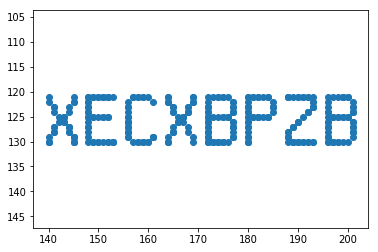

In [4]:
plt.scatter(poss[i,:,0], poss[i,:,1])
plt.axis('equal')
plt.ylim(plt.ylim()[::-1])